# Import

In [53]:
%pip install pandas
%pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Start

In [55]:
housing_dataset = fetch_california_housing(as_frame=True)
print(housing_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [56]:
df = housing_dataset.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Cleaning

In [57]:
print("DF info: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
DF info:  None


In [58]:
print("Check missing value: ", df.isnull().sum())

Check missing value:  MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


No missing values then...

# EDA (Exploratory Data Analysis)

## Describe

In [59]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Range

In [60]:
range = df.describe().loc['max'] - df.describe().loc['min']
print(range)

MedInc            14.500200
HouseAge          51.000000
AveRooms         141.062937
AveBedrms         33.733333
Population     35679.000000
AveOccup        1242.641026
Latitude           9.410000
Longitude         10.040000
MedHouseVal        4.850020
dtype: float64


In [61]:
%pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### I want to know all values of population?

In [62]:
print(df['Population'])

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: Population, Length: 20640, dtype: float64


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

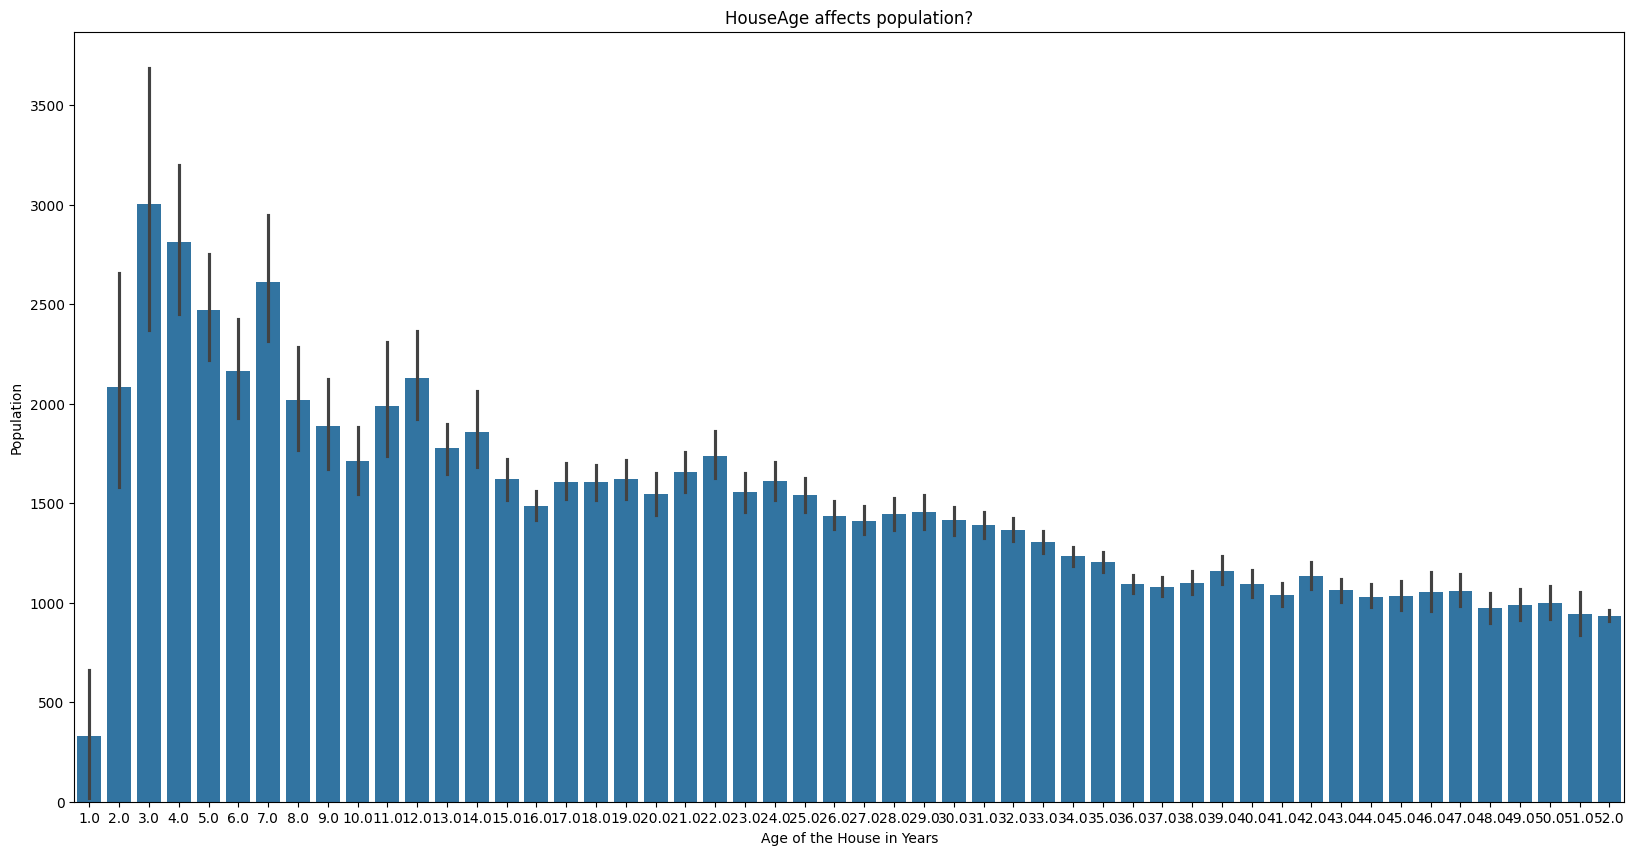

In [64]:
#Plot
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="HouseAge", y="Population")
plt.title("HouseAge affects population?")
plt.xlabel("Age of the House in Years")
plt.ylabel("Population")
plt.show()

This tells me that:
- The older the house is the least population will be

## I want to know more...

In [65]:
%pip install plotly
%pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
import plotly.express as px

fig = px.scatter(df, x="Population", y="Latitude")
fig.show()

It tells me, that people prefer to live in Latitudes lower than 40.5

In [67]:
import plotly.express as px
import statsmodels

fig2 = px.scatter(df, x="MedInc", y="MedHouseVal", trendline="ols")
fig2.show()

## Linear Regression

### Split the data

In [68]:
from sklearn.model_selection import train_test_split

So what happens with this function, is that the data is shuffled randomly. Before even being divided into training and testing.

In [69]:
X = df.drop('MedHouseVal', axis=1)
y = df['HouseAge']

# test_size = 0.2, specifies the proportion of the dataset to include in test, so it will be 20%.
# random_state = 42, controls the random number generator used.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


So here I'm just calling at the function of train_test_split() from sklearn. This is used to split the dataset into training and testing subsets. So basically, I'm using part of the info from the column MedHouseVal to use it as training and the other part as testing (The same happens with HouseAge column)
- X variable: input variables (Feature)
- y variable: Output variables (Target)
- random_state = So basically it ensures that the splits you generate can be used or accessed again / reproducible. 

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluate Model

In [72]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

In [76]:
print("--- Training Set Metrics ---")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R-squared: {r2_train:.4f}")
print("-" * 30)

--- Training Set Metrics ---
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R-squared: 1.0000
------------------------------
